In [1]:
import os

from xcube.core.store import new_data_store
from xcube.core.maskset import MaskSet
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
xr.set_options(display_expand_attrs=False)

In [3]:
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [6]:
ds = s3_store.open_data("cubes/temp/training/0.2.0/0000_0.zarr")
ds

<xarray.Dataset> Size: 54MB
Dimensions:        (time: 132, y: 91, x: 91, angle: 2, angle_y: 2, angle_x: 2,
                    band: 12)
Coordinates:
  * angle          (angle) object 16B 'zenith' 'azimuth'
  * angle_x        (angle_x) float64 16B 4.831e+05 4.881e+05
  * angle_y        (angle_y) float64 16B 6.769e+06 6.764e+06
  * band           (band) <U3 144B 'B01' 'B02' 'B03' 'B04' ... 'B09' 'B11' 'B12'
    spatial_ref    int64 8B ...
  * time           (time) datetime64[ns] 1kB 2019-02-10T10:52:09.024000 ... 2...
  * x              (x) float64 728B 4.831e+05 4.831e+05 ... 4.84e+05 4.84e+05
  * y              (y) float64 728B 6.765e+06 6.765e+06 ... 6.764e+06 6.764e+06
Data variables: (12/15)
    B01            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B02            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B03            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B04            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B05            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B06            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    ...             ...
    B11            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B12            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    B8A            (time, y, x) float32 4MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    SCL            (time, y, x) uint8 1MB dask.array<chunksize=(1, 91, 91), meta=np.ndarray>
    solar_angle    (angle, time, angle_y, angle_x) float32 4kB dask.array<chunksize=(2, 1, 2, 2), meta=np.ndarray>
    viewing_angle  (angle, band, time, angle_y, angle_x) float32 51kB dask.array<chunksize=(2, 12, 1, 2, 2), meta=np.ndarray>
Attributes: (3)

In [7]:
ds_pc = s3_store.open_data("cubes/temp/training/0.4.0/0000_0.zarr")
ds_pc

<xarray.Dataset> Size: 67MB
Dimensions:        (time: 132, y: 90, x: 90, angle: 2, angle_y: 23,
                    angle_x: 23, band: 12)
Coordinates:
  * angle          (angle) object 16B 'zenith' 'azimuth'
  * angle_x        (angle_x) float64 184B 4e+05 4.05e+05 ... 5.05e+05 5.1e+05
  * angle_y        (angle_y) float64 184B 6.8e+06 6.795e+06 ... 6.69e+06
  * band           (band) <U3 144B 'B01' 'B02' 'B03' 'B04' ... 'B09' 'B11' 'B12'
    spatial_ref    int64 8B ...
  * time           (time) datetime64[ns] 1kB 2019-02-10T10:52:09.024000 ... 2...
  * x              (x) float64 720B 4.831e+05 4.831e+05 ... 4.84e+05 4.84e+05
  * y              (y) float64 720B 6.765e+06 6.765e+06 ... 6.764e+06 6.764e+06
Data variables: (12/15)
    B01            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B02            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B03            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B04            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B05            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B06            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    ...             ...
    B11            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B12            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    B8A            (time, y, x) float32 4MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    SCL            (time, y, x) float64 9MB dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    solar_angle    (time, angle, angle_y, angle_x) float32 559kB dask.array<chunksize=(1, 2, 23, 23), meta=np.ndarray>
    viewing_angle  (time, angle, band, angle_y, angle_x) float32 7MB dask.array<chunksize=(1, 2, 12, 23, 23), meta=np.ndarray>
Attributes: (4)

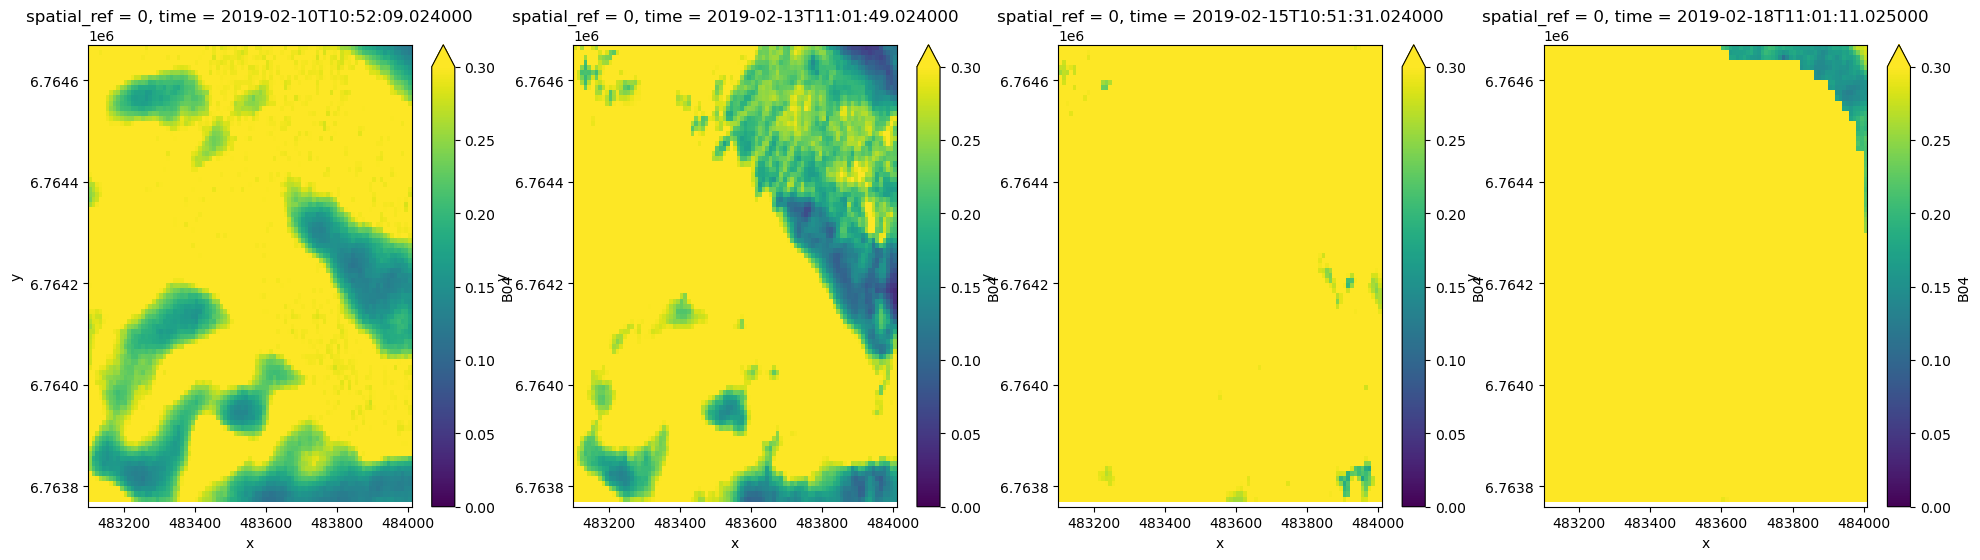

In [10]:
fig, _ax = plt.subplots(1, 4, figsize=(6*4, 6*1))
ax = _ax.flatten()
for i in range(4):
    ds.B04.isel(time=i).plot(ax=ax[i], vmax=0.3, vmin=0.)

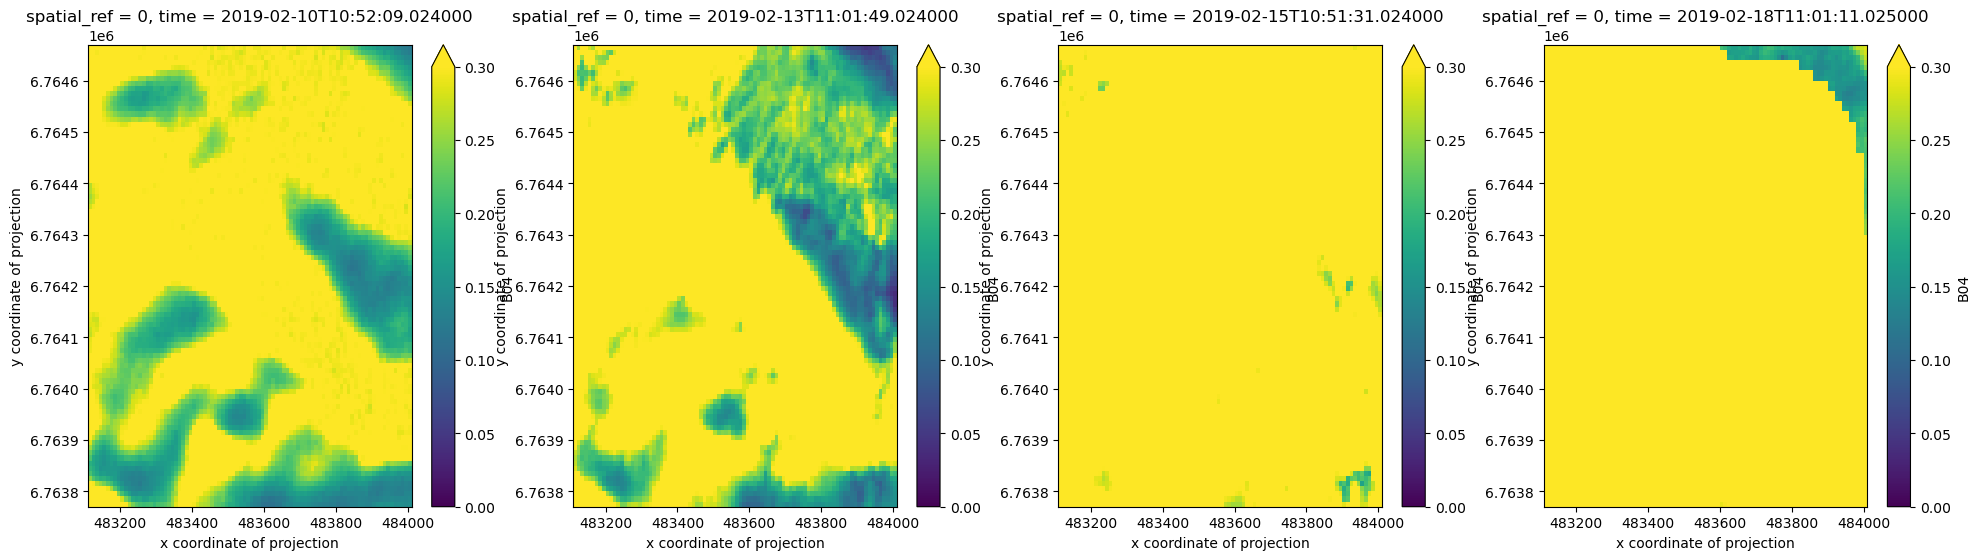

In [11]:
fig, _ax = plt.subplots(1, 4, figsize=(6*4, 6*1))
ax = _ax.flatten()
for i in range(4):
    ds_pc.B04.isel(time=i).plot(ax=ax[i], vmax=0.3, vmin=0.)

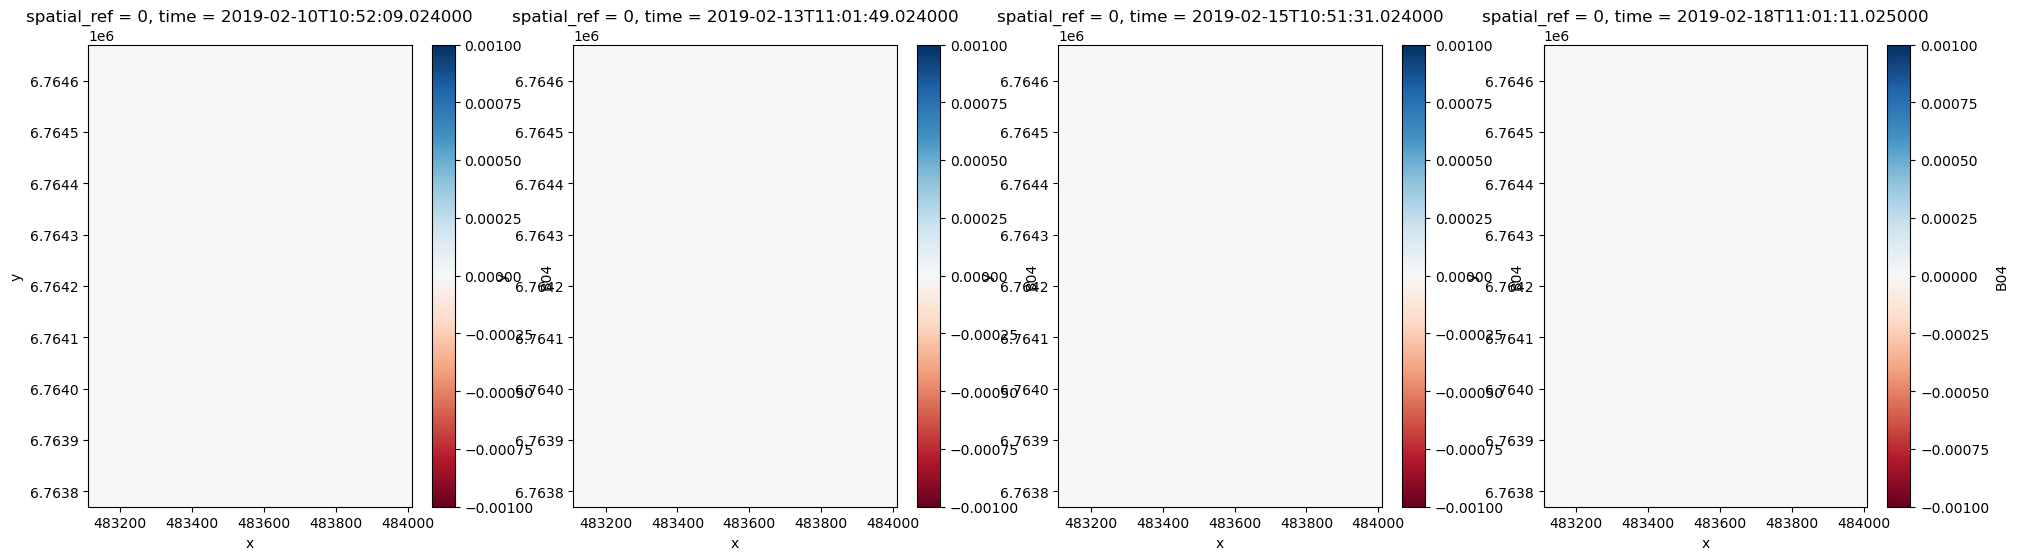

In [15]:
fig, _ax = plt.subplots(1, 4, figsize=(6*4, 6*1))
ax = _ax.flatten()
for i in range(4):
    (ds.B04.isel(time=i) - ds_pc.B04.isel(time=i)).plot(ax=ax[i], vmax=0.001, vmin=-0.001, cmap="RdBu")

In [49]:
cloud_mask_mask = MaskSet(ds.cloud_mask)
cmap, norm = cloud_mask_mask.get_cmap()
cloud_mask_mask

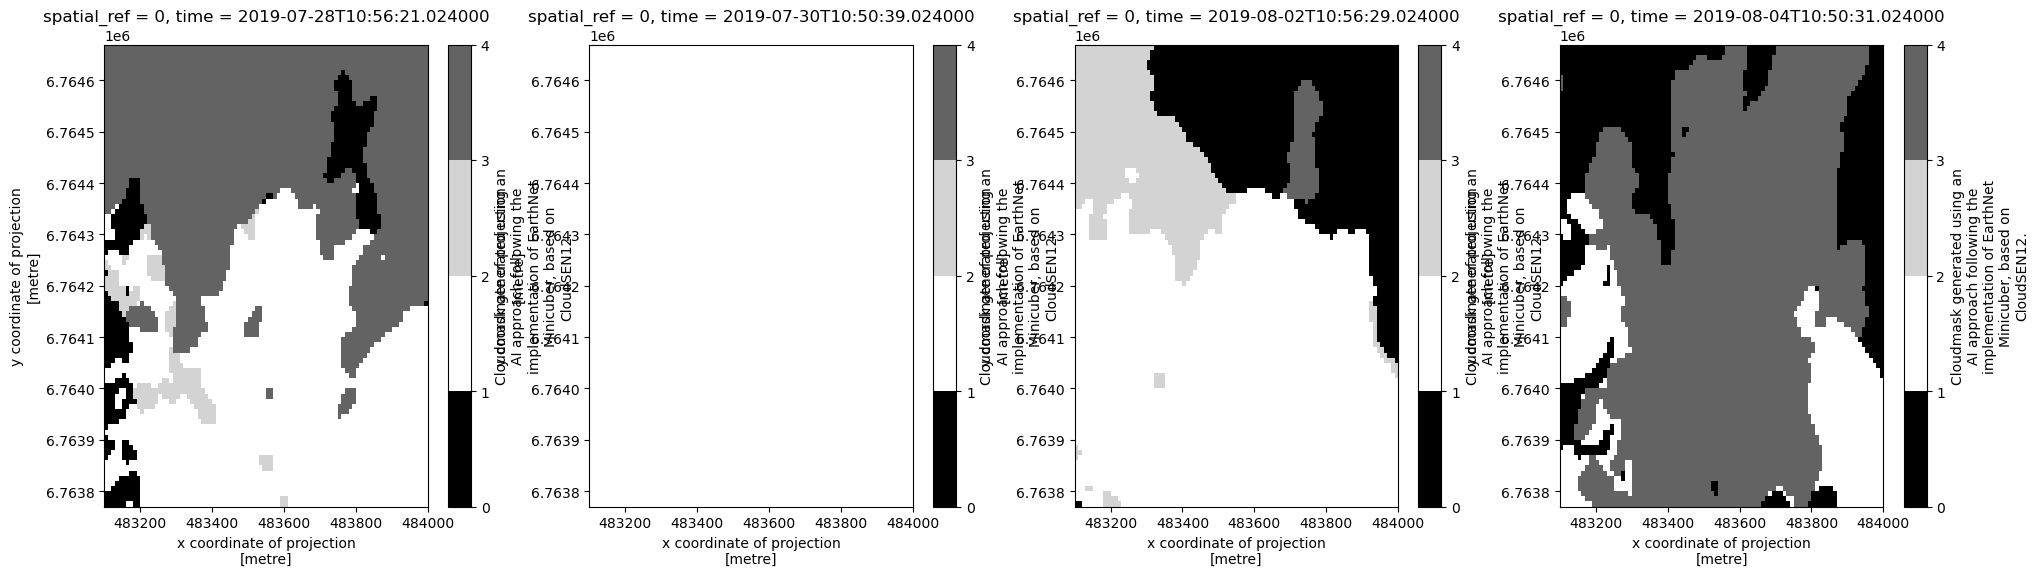

In [50]:
fig, _ax = plt.subplots(1, 4, figsize=(6*4, 6*1))
ax = _ax.flatten()
for i in range(4):
    ds.cloud_mask.isel(time=43+i).plot(ax=ax[i], cmap=cmap, norm=norm)

In [52]:
scl_mask = MaskSet(ds.scl)
cmap, norm = scl_mask.get_cmap()
scl_mask

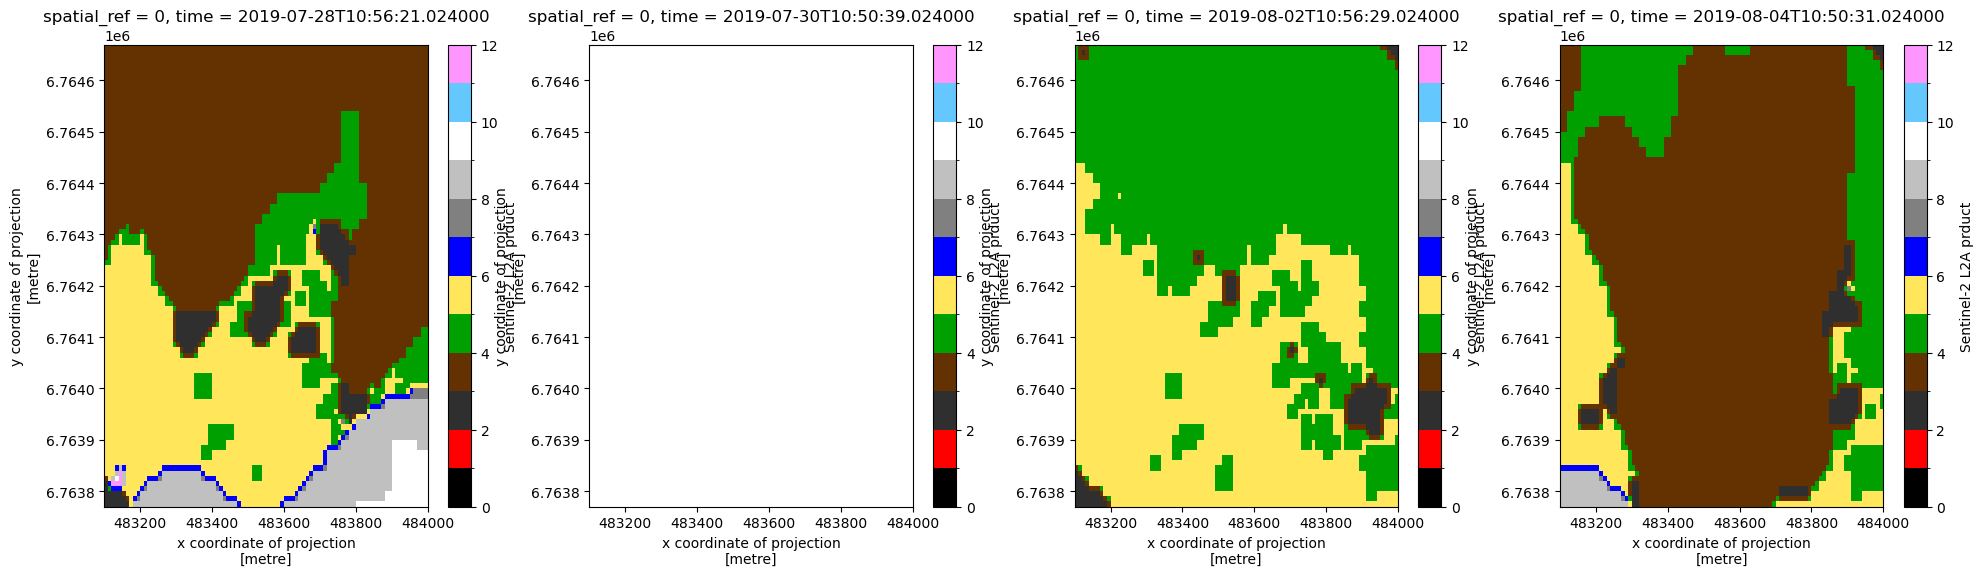

In [53]:
fig, _ax = plt.subplots(1, 4, figsize=(6*4, 6*1))
ax = _ax.flatten()
for i in range(4):
    ds.scl.isel(time=43+i).plot(ax=ax[i], cmap=cmap, norm=norm)

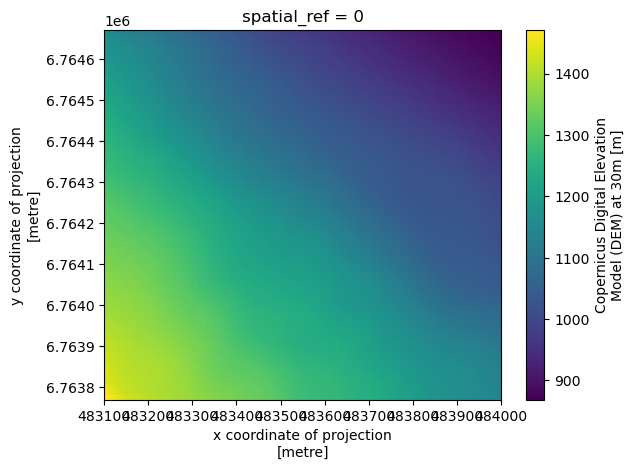

In [43]:
ds.dem.plot()

In [44]:
land_cover_mask = MaskSet(ds.lccs_class)
land_cover_mask

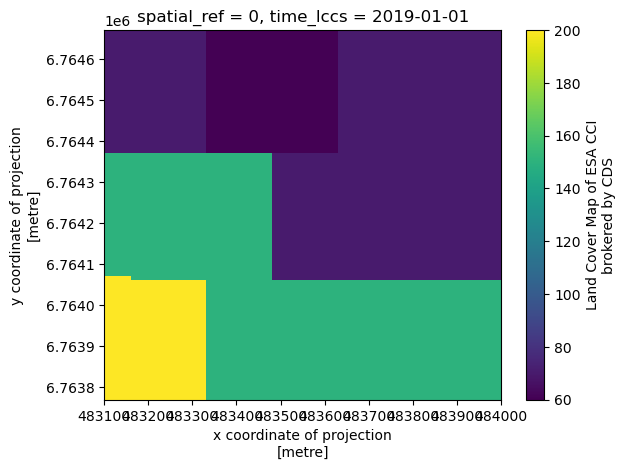

In [45]:
cmap, norm = land_cover_mask.get_cmap()
ds.lccs_class.isel(time_lccs=0).plot(cmap=cmap, norm=norm)

In [46]:
esa_wc_mask = MaskSet(ds.esa_wc)
esa_wc_mask

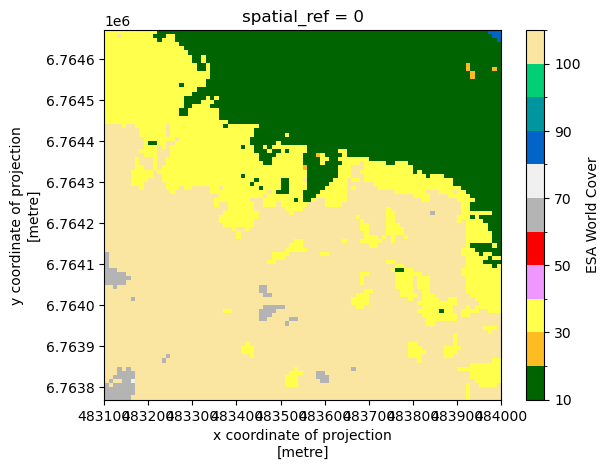

In [47]:
cmap, norm = esa_wc_mask.get_cmap()
ds.esa_wc.plot(cmap=cmap, norm=norm)

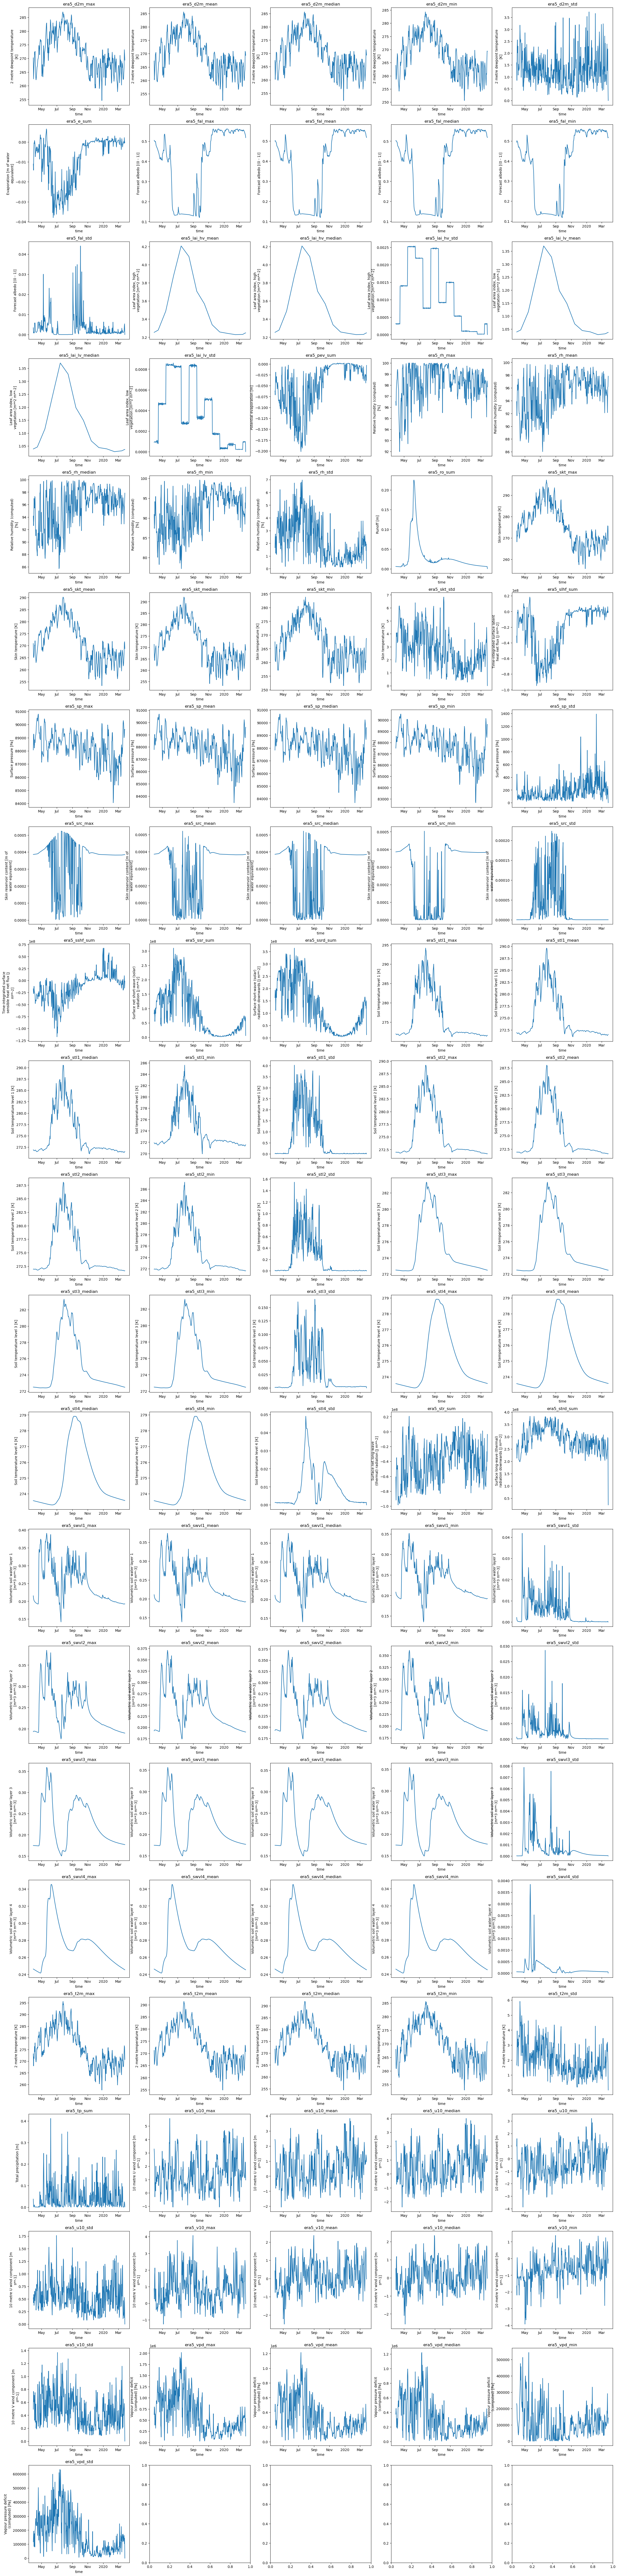

In [48]:
fig, _ax = plt.subplots(22, 5, figsize=(6*5, 6*22))
ax = _ax.flatten()
era5_vars = [var for var in ds.data_vars if "era5" in var]
for i, var in enumerate(era5_vars):
    ds[var].plot(ax=ax[i])
    ax[i].set_title(var)